# Project Shark Attack

### GENERAL
Set up the dataframe for initial cleaning and analysis.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt

In [2]:
#open the dictionaty that will be necessary to analize what the victimns were doing when they were attacked by a shark
with open('surfing_dict.pickle', 'rb') as f:
    surfing_dict = pickle.load(f)

In [3]:
#open the dictionaty that will be necessary to analize the Country column
with open('country_dict.pickle', 'rb') as f:
    country_dict = pickle.load(f)

In [4]:
#read and display the dataframe shark attacks
#read the excel file in a variable called shark_attacks
shark_attacks = pd.read_excel(r'C:\Users\PC\Desktop\Ironhack\WR_Ironhack_Projects\shark_attack\GSAF5.xls')

#display the dataframe
shark_attacks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,25-Mar-2023,2023.0,Unprovoked,USA,Florida,"Blue Fish Channel, Key West, Monroe County",Kite-Surfing,Kevin Carlton Scott,M,67,...,NaN,"Yahoo News, 3/28/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Mar-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Delta Island,Wading,Adam Norton,M,30s,...,NaN,"A. Currie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-Mar-2023,2023.0,Unprovoked,USA,Hawaii,Anaehoomalu Bay,Swimming,male,M,60,...,NaN,"Khon2, 3/19/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17-Mar-2023,2023.0,Unprovoked,MEXICO,Quintana Roo,Cancún,Swimming,Dillon Armijo,M,10,...,NaN,"Denver7, 3/29/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16-Mar-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,female,F,NaN,...,5m to 6m shark,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#check infos about 
#look for null columns
shark_attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6840 non-null   object 
 1   Year                    6838 non-null   float64
 2   Type                    6820 non-null   object 
 3   Country                 6790 non-null   object 
 4   Area                    6362 non-null   object 
 5   Location                6279 non-null   object 
 6   Activity                6257 non-null   object 
 7   Name                    6621 non-null   object 
 8   Sex                     6263 non-null   object 
 9   Age                     3869 non-null   object 
 10  Injury                  6805 non-null   object 
 11  Fatal (Y/N)             6282 non-null   object 
 12  Time                    3339 non-null   object 
 13  Species                 3757 non-null   object 
 14  Investigator or Source  6821 non-null   

In [6]:
#treat and display the dataframe shark attacks
#tremove the space from all column tittles
shark_attacks.columns = shark_attacks.columns.str.rstrip()

#eliminate columns filled with NaN elements and all the others that have no use to my analysis
shark_attacks.drop(columns = ['Unnamed: 21', 'Unnamed: 22', 'Date', 'Name', 'Species', 'Type', 'Time', 
                              'pdf', 'href formula', 'href', 'Case Number', 
                              'Case Number.1', 'original order', 'Injury'], inplace = True)


#eliminate rows filled with ONLY NaN values
shark_attacks.dropna(axis = 0, how = 'all', inplace = True)

#display the first 10 rows of the dataframe
shark_attacks.head(50)

,Year,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Investigator or Source
0,2023.0,USA,Florida,"Blue Fish Channel, Key West, Monroe County",Kite-Surfing,M,67,N,"Yahoo News, 3/28/2023"
1,2023.0,AUSTRALIA,Western Australia,Delta Island,Wading,M,30s,N,"A. Currie, GSAF"
2,2023.0,USA,Hawaii,Anaehoomalu Bay,Swimming,M,60,N,"Khon2, 3/19/2023"
3,2023.0,MEXICO,Quintana Roo,Cancún,Swimming,M,10,N,"Denver7, 3/29/2023"
4,2023.0,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,F,NaN,N,"B. Myatt, GSAF"
5,2023.0,BRAZIL,Pernambuco,Piedade Beach,Swimming,F,15,N,"JC, 3/6/2023"
6,2023.0,BRAZIL,Pernambuco,Piedade Beach,Swimming,M,14,N,"JC, 3/6/2023"
7,2023.0,SEYCHELLES,Praslin Island,NaN,Snorkeling,M,6,NaN,"Midlibre, 3/18/2023"
8,2023.0,BRAZIL,Pernambuco,Praia de Milagres,Surfing,M,32,N,"Globo, 2/21/2023"
9,2023.0,NEW CALEDONIA,South Province,"Château-Royal Beach , Noumea",Swimming,M,59,F,"B, Myatt, GSAF"


In [7]:
#clean the column Investigator or Source from numeric digits and special symbols
shark_attacks['Investigator or Source'] = shark_attacks['Investigator or Source'].str.replace('[^a-zA-Z\s\.]+', '', regex = True)

In [8]:
shark_attacks.head(50)

,Year,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Investigator or Source
0,2023.0,USA,Florida,"Blue Fish Channel, Key West, Monroe County",Kite-Surfing,M,67,N,Yahoo News
1,2023.0,AUSTRALIA,Western Australia,Delta Island,Wading,M,30s,N,A. Currie GSAF
2,2023.0,USA,Hawaii,Anaehoomalu Bay,Swimming,M,60,N,Khon
3,2023.0,MEXICO,Quintana Roo,Cancún,Swimming,M,10,N,Denver
4,2023.0,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,F,NaN,N,B. Myatt GSAF
5,2023.0,BRAZIL,Pernambuco,Piedade Beach,Swimming,F,15,N,JC
6,2023.0,BRAZIL,Pernambuco,Piedade Beach,Swimming,M,14,N,JC
7,2023.0,SEYCHELLES,Praslin Island,NaN,Snorkeling,M,6,NaN,Midlibre
8,2023.0,BRAZIL,Pernambuco,Praia de Milagres,Surfing,M,32,N,Globo
9,2023.0,NEW CALEDONIA,South Province,"Château-Royal Beach , Noumea",Swimming,M,59,F,B Myatt GSAF


### INVESTIGATOR OR SOURCE
Check if the source is biased or not.

In [9]:
#count the lenght of unique elements in Investigator or Source column
print(len(shark_attacks['Investigator or Source'].unique().tolist()))

#count how many times each elemnt appear in Investigator or Source column source only if appears more than once
count_source = shark_attacks['Investigator or Source'].value_counts()
count_source = count_source[count_source > 1]
print(count_source)

3698
K. McMurray TrackingSharks.com      131
C. Moore GSAF                       105
C. Creswell GSAF                     98
S. Petersohn GSAF                    82
V.M. Coppleson  p.                   80
                                   ... 
K. McMurray Tracking Sharks.com       2
Tampa Bay Times                       2
Khon                                  2
Daytona Beach News Journal            2
C. Moore citing R. Peirce             2
Name: Investigator or Source, Length: 689, dtype: int64


After checking the top ten sources it it is noticeable that most of the data comes from american sources.  
However it is difficult to conclude that the information is biased since the Shark Research Institute performs it's research worldwide.  

1. K. McMurray   
(https://www.trackingsharks.com) american website.  

2. C. Moore  
(https://cmooremedia.com/about) american international relations.  

3. C. Creswell   
(https://www.linkedin.com/in/clay-creswell-ab109647) american shark attack investigator.

4. S. Petersohn  
(https://www.linkedin.com/in/scott-petersohn-8a0580a7) american Deputy Chief of operations at Volusia County Beach Patrol.  
5. V.M. Coppleson  
(https://pubmed.ncbi.nlm.nih.gov/14852153/) unknown nationality but conducted studies related to shark attacks in Australia in the 50's.  

6. R. Collier  
(https://www.sharks.org/ralph-collier) american President & Founder at Shark Research Committee.  

7. R. Collier  
(https://www.sharks.org/ralph-collier) american President & Founder at Shark Research Committee.  

8. B. Myatt  
unknown  

9. T. Peake   
unkown  

10. M. Levine  
(https://www.sharks.org/marie-levine) amrican Executive Director at Shark Research Institute



### AGE
Clean and organize and present results of Age column.

In [10]:
#treat and present results of column Age
#check the lengh of column Age and print how many shark attack cases have been reported
len_age = len(shark_attacks['Age'])
print(f'Until 2023 there was {len_age} reported shark attacks worldwide.')

#check unique elements in Age column
#print(shark_attacks['Age'].unique().tolist())

#check how many elements appear only once on Age column
value_counts_age = shark_attacks['Age'].value_counts()
unique_values_age = value_counts_age[value_counts_age == 1]
unique_list_age = unique_values_age.index.tolist()
#print(unique_list_age)
#print(len(unique_list_age))

#convert NaN to numeric values
shark_attacks['Age'] = pd.to_numeric(shark_attacks['Age'], errors = 'coerce')

#convert NaN to -1
shark_attacks['Age'].fillna( -1, inplace = True)

#convert column Age from object to int
shark_attacks['Age'] = shark_attacks['Age'].astype(int)

#check how many people from 0 - 19 yeras old were attacked
age_0_19 = shark_attacks[(shark_attacks['Age'] >= 0) & (shark_attacks['Age'] <= 19)]
count_age_0_19 = len(age_0_19)
print(f'\nThe number of people attacked by sharks from ages 1 to 19 is {count_age_0_19}.')

#create classes of different age groups and get the % of each group in column Age
age_count_group = pd.cut(shark_attacks['Age'], [-2, 0, 19, 40, 61, 110], labels = ['No Class', 'Youth (1-19)',
             'Young Adults (20-40)', 'Adults (40-62)', 'Elderly (62+)']).value_counts(normalize = True) * 100

age_count_group = age_count_group.round().astype(int)
print(f'\n% of shark attacks for each group:\n{age_count_group}')

Until 2023 there was 6840 reported shark attacks worldwide.

The number of people attacked by sharks from ages 1 to 19 is 1316.

% of shark attacks for each group:
No Class                45
Young Adults (20-40)    25
Youth (1-19)            19
Adults (40-62)           9
Elderly (62+)            1
Name: Age, dtype: int32


### SEX
Clean and organize and present results of Sex column.

In [11]:
#treat and present results of column Sex
#convert all the letters in the column Sex to upperercase
shark_attacks['Sex'] = shark_attacks['Sex'].str.upper()

#remove spaces
shark_attacks['Sex'] = shark_attacks['Sex'].str.replace(' ', '')

#check unique elements in Sex column
#print(shark_attacks['Sex'].unique().tolist())

#check how many NaN in column Sex
nan_sum_sex = shark_attacks['Sex'].isna().sum()

#replace NaN in Sex column with the acronym 'unk'
shark_attacks['Sex'].fillna('unk', inplace = True)

#replace the unkown items to the acronym 'unk' 
unk_words_sex = {'LLI': 'unk', 'MX2': 'M', 'N': 'unk', '.': 'unk'}
shark_attacks['Sex'] = shark_attacks['Sex'].replace(unk_words_sex)

#confirm that 'unk' is the only unique element besides 'M' and 'F'
differnet_sex = shark_attacks.loc[~shark_attacks['Sex'].isin(['M', 'F']), 'Sex']
unique_different_sex = differnet_sex.unique()
#print(unique_different_sex)

#how many shark attacks on M and F
count_male = shark_attacks['Sex'].str.count('M').sum()
count_female = shark_attacks['Sex'].str.count('F').sum()
print(f'According to collected data, {count_male} men and {count_female} woman were attacked by sharks worldwide.')

#present the % of attacks in both genders
sex_attacks = shark_attacks['Sex'].value_counts(True) * 100
sex_attacks = sex_attacks.round().astype(int)
print(f'\n% of attacks in Men(M) and Women(F):\n{sex_attacks}')

According to collected data, 5509 men and 750 woman were attacked by sharks worldwide.

% of attacks in Men(M) and Women(F):
M      81
F      11
unk     8
Name: Sex, dtype: int32


### ACTIVITY
Clean and organize and present results of Activity column.

In [12]:
#treat and present results of column Activity
#convert all the letters in the column Activity to lower
shark_attacks['Activity'] = shark_attacks['Activity'].str.lower()

#check if there are numeric elements in Activity column
num_act = shark_attacks['Activity'].str.contains('\d').any()
#num_act

#check if there are numeric elements different than NaN in Activity column
not_nan_sex = pd.to_numeric(shark_attacks['Activity'], errors = 'coerce').notnull().any()
#not_nan_sex

#check how many NaN in column Activity
nan_sum_act = shark_attacks['Activity'].isna().sum()
#nan_sum_act

#replace NaN in Activity column to the acronym 'unk'
shark_attacks['Activity'].fillna('unk', inplace = True)

#check the list of unique elements in column Activity
#print(sorted(shark_attacks['Activity'].unique().tolist()))

#treatment of the column Activity with the dictionary that was loaded in the beginning of the code
shark_attacks['Activity'] = shark_attacks['Activity'].map(surfing_dict).fillna('unk')

#how many shark attacks on surfers
count_surfing = shark_attacks['Activity'].str.count('surfing').sum()
print(f"Although almost 50% of the incidents caused by sharks have no clear information about what extacly the victim was doing, surfing appears to be the riskiest kown activity practice when considering shark attacks.\nIn the last 200 years {count_surfing} people were victims of shark attacks while surfing.")

#present the % of attacks for each activity
activity_attacks = shark_attacks['Activity'].value_counts(True) * 100
#activity_attacks = activity_attacks.round().astype(int)
print(f'\n% of attacks for each activity:\n\n{activity_attacks}.')

Although almost 50% of the incidents caused by sharks have no clear information about what extacly the victim was doing, surfing appears to be the riskiest kown activity practice when considering shark attacks.
In the last 200 years 1174 people were victims of shark attacks while surfing.

% of attacks for each activity:

unk             44.546784
surfing         17.163743
swimming        13.947368
fishing          7.017544
spearfishing     5.467836
bathing          4.254386
wading           2.456140
diving           2.061404
snorkeling       1.798246
kayaking         0.570175
kite             0.204678
paddling         0.160819
freediving       0.146199
boating          0.116959
walking          0.043860
wing foiling     0.029240
boggie           0.014620
Name: Activity, dtype: float64.


### ATTACKS OUTCOME 
Clean and organize and present results of Fatal column.

In [13]:
#treat and present results of column Fatal 
#convert all the letters in the column Sex to upperercase
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].str.upper()

#remove spaces
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].str.replace(' ', '')

#check list of unique elements in column Fatal
#print(shark_attacks['Fatal (Y/N)'].unique().tolist())

#check how many NaN in column Sex
nan_sum_fatal = shark_attacks['Fatal (Y/N)'].isna().sum()
#nan_sum_fatal

#replace NaN with 'unk'
shark_attacks['Fatal (Y/N)'].fillna('unk', inplace = True)

#create a dictionary to replace words
unk_words_fatal = {'F': 'Y', 'UNKNOWN': 'unk', 'YX2': 'Y', 'M': 'unk', 'NQ': 'unk'}
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].replace(unk_words_fatal)

#check if there is something besides the proper answeres (Y/N) or 'unk'
differnet_fatal = shark_attacks.loc[~shark_attacks['Fatal (Y/N)'].isin(['Y', 'N']), 'Fatal (Y/N)']
unique_different_fatal = differnet_fatal.unique()
#print(unique_different_fatal)

#count the data e present the results for Fatal column
count_n_fatal = shark_attacks['Fatal (Y/N)'].str.count('N').sum()
count_y_fatal = shark_attacks['Fatal (Y/N)'].str.count('Y').sum()
count_u_fatal = shark_attacks['Fatal (Y/N)'].str.count('unk').sum()
print(f'According to data that have been colected worldwide, {count_y_fatal} people were killed by sharks and {count_n_fatal} were attacked but survived.\nThere is also {count_u_fatal} reported cases of an unkown outcome.')
#print(count_n_fatal + count_y_fatal + count_u_fatal)

According to data that have been colected worldwide, 1447 people were killed by sharks and 4760 were attacked but survived.
There is also 633 reported cases of an unkown outcome.


### AGE GROUP
Create a new group to separate classes of age groups.  

In [14]:
#create and display a new column called Age Groups
#create a funcion to determine the surfer's age group
def age_group(age):
    """use conditionals to determine if x age belongs to x_age_group
    exemple: input: 35 years
             output: young adult group"""
    if age <= 0:
        return 'No Class'
    elif age <= 19:
        return 'Youth'
    elif age <= 40:
        return 'Young Adult'
    elif age < 61:
        return 'Adult'
    else:
        return 'Elderly'

#create the new column
shark_attacks.insert(7, 'Age Group', shark_attacks['Age'].apply(age_group))

#after the calculation was done, transform -1 to unk to be more presentable and readable in the dataframe
shark_attacks['Age'] = shark_attacks['Age'].replace(-1, 'unk')

#present final dataframe
shark_attacks.head(10)

,Year,Country,Area,Location,Activity,Sex,Age,Age Group,Fatal (Y/N),Investigator or Source
0,2023.0,USA,Florida,"Blue Fish Channel, Key West, Monroe County",kite,M,67,Elderly,N,Yahoo News
1,2023.0,AUSTRALIA,Western Australia,Delta Island,wading,M,unk,No Class,N,A. Currie GSAF
2,2023.0,USA,Hawaii,Anaehoomalu Bay,swimming,M,60,Adult,N,Khon
3,2023.0,MEXICO,Quintana Roo,Cancún,swimming,M,10,Youth,N,Denver
4,2023.0,AUSTRALIA,Western Australia,Cheynes Beach,unk,F,unk,No Class,N,B. Myatt GSAF
5,2023.0,BRAZIL,Pernambuco,Piedade Beach,swimming,F,15,Youth,N,JC
6,2023.0,BRAZIL,Pernambuco,Piedade Beach,swimming,M,14,Youth,N,JC
7,2023.0,SEYCHELLES,Praslin Island,NaN,snorkeling,M,6,Youth,unk,Midlibre
8,2023.0,BRAZIL,Pernambuco,Praia de Milagres,surfing,M,32,Young Adult,N,Globo
9,2023.0,NEW CALEDONIA,South Province,"Château-Royal Beach , Noumea",swimming,M,59,Adult,Y,B Myatt GSAF


### TESTING HYPOTHESIS

#### First: Surfers from ages between 1 to 19 are most likely to be attacked by sharks.

In [15]:
#show shark attacks on surfers separetaed by age group 
no_class_surfers = shark_attacks.groupby(['Age Group', 'Activity']).size()['No Class', 'surfing']
youth_surfers = shark_attacks.groupby(['Age Group', 'Activity']).size()['Youth', 'surfing']
y_adult_surfers = shark_attacks.groupby(['Age Group', 'Activity']).size()['Young Adult', 'surfing']
adult_surfers = shark_attacks.groupby(['Age Group', 'Activity']).size()['Adult', 'surfing']
elderly_surfers = shark_attacks.groupby(['Age Group', 'Activity']).size()['Elderly', 'surfing']

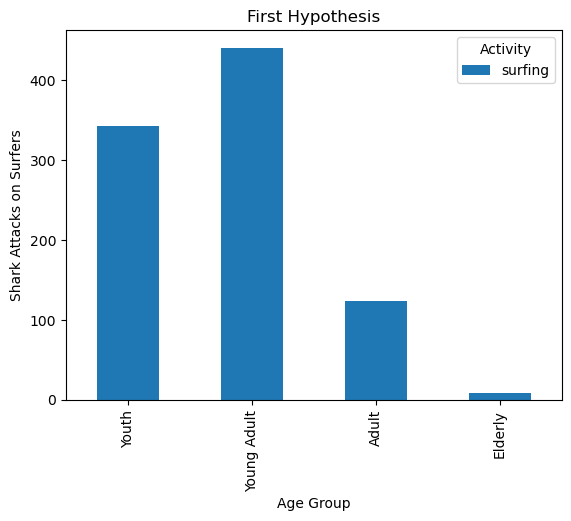

In [16]:
#present chart first hypothesis
first_hypothesis = pd.pivot_table(shark_attacks.query('Activity == "surfing"'), index = 'Age Group', columns = 'Activity', aggfunc = 'count', values = 'Year').loc[['Youth', 'Young Adult', 'Adult', 'Elderly']].plot(kind = 'bar')

first_hypothesis.set_ylabel('Shark Attacks on Surfers')
first_hypothesis.set_title('First Hypothesis')

plt.show()

In [17]:
#print results
print(f'The total number of shark attacks on surfers was {no_class_surfers + youth_surfers + y_adult_surfers + adult_surfers + elderly_surfers}.')
print(f'\n{no_class_surfers} unkown surfers were victims of shark attacks.')
print(f'{youth_surfers} children and teenagers were victims of shark attacks while surfing.')
print(f'{y_adult_surfers} young adults were victims of shark attacks while surfing.')
print(f'{adult_surfers} adults were victims of shark attacks while surfing.')
print(f'{elderly_surfers} elderly people were victims of shark attacks while surfing.')

print(f'\nThe results shows that my first hypothesis - Surfers from 1 to 19 years old are most likely to be attacked by sharks - was false.\nThe age group more affected by this kind of incident is the {y_adult_surfers}')

The total number of shark attacks on surfers was 1174.

257 unkown surfers were victims of shark attacks.
343 children and teenagers were victims of shark attacks while surfing.
441 young adults were victims of shark attacks while surfing.
124 adults were victims of shark attacks while surfing.
9 elderly people were victims of shark attacks while surfing.

The results shows that my first hypothesis - Surfers from 1 to 19 years old are most likely to be attacked by sharks - was false.
The age group more affected by this kind of incident is the 441


In [18]:
#demonstrate how many people of each age group and gender were victims of shark attack while surfing and the fatalities ouctcome
no_class_surfers_x = shark_attacks[(shark_attacks['Age Group'] == 'No Class') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M')].shape[0]
no_class_surfers_y = shark_attacks[(shark_attacks['Age Group'] == 'No Class') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F')].shape[0]

youth_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Youth') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M')].shape[0]
youth_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Youth') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F')].shape[0]

y_adult_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Young Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M')].shape[0]
y_adult_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Young Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F')].shape[0]

adult_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M')].shape[0]
adult_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F')].shape[0]

elderly_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Elderly') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M')].shape[0]
elderly_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Elderly') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F')].shape[0]

#add the variables indicating gender to check if the the result is equal to the number of shark attacks on surfers 
total = no_class_surfers_x+no_class_surfers_y+youth_surfers_m+youth_surfers_f+y_adult_surfers_m+y_adult_surfers_f+adult_surfers_m+adult_surfers_f+elderly_surfers_m+elderly_surfers_f
#print(t)

f_no_class_surfers_x = shark_attacks[(shark_attacks['Age Group'] == 'No Class') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]
f_no_class_surfers_y = shark_attacks[(shark_attacks['Age Group'] == 'No Class') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]

f_youth_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Youth') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]
f_youth_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Youth') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]

f_y_adult_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Young Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]
f_y_adult_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Young Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]

f_adult_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]
f_adult_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Adult') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]

f_elderly_surfers_m = shark_attacks[(shark_attacks['Age Group'] == 'Elderly') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'M') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]
f_elderly_surfers_f = shark_attacks[(shark_attacks['Age Group'] == 'Elderly') & (shark_attacks['Activity'] == 'surfing') & (shark_attacks['Sex'] == 'F') & (shark_attacks['Fatal (Y/N)'] == 'Y')].shape[0]

print('The gender and age group of the victmims of shark attacks while surfing as well as the fatalities outcomes were:\n')
print(f'{youth_surfers_m} male children and teenagers.\n{f_youth_surfers_m} cases were fatal.\n')
print(f'{youth_surfers_f} female children and teenager.\n{f_youth_surfers_f} case was fatal.\n')
print(f'{y_adult_surfers_m} young adults men.\n{f_y_adult_surfers_m} cases were fatal.\n')
print(f'{y_adult_surfers_f} young adults women.\n{f_y_adult_surfers_f} cases were fatal.\n')
print(f'{adult_surfers_m} adult men.\n{f_adult_surfers_m} cases were fatal.\n')
print(f'{adult_surfers_f} adult women.\n{f_adult_surfers_f} cases were fatal.\n')
print(f'{elderly_surfers_m} elderly men.\n{f_elderly_surfers_m} cases were fatal.\n')
print(f'{elderly_surfers_f} elderly women.\n{f_elderly_surfers_f} cases were fatal.\n')
print(f'{no_class_surfers_x} men of unkown age.\n{f_no_class_surfers_x} cases were fatal.\n')
print(f'{no_class_surfers_y} women of unkown age.\n{f_no_class_surfers_y} case was fatal.')

The gender and age group of the victmims of shark attacks while surfing as well as the fatalities outcomes were:

310 male children and teenagers.
17 cases were fatal.

24 female children and teenager.
1 case was fatal.

414 young adults men.
31 cases were fatal.

26 young adults women.
0 cases were fatal.

121 adult men.
8 cases were fatal.

3 adult women.
0 cases were fatal.

7 elderly men.
0 cases were fatal.

2 elderly women.
0 cases were fatal.

212 men of unkown age.
8 cases were fatal.

28 women of unkown age.
1 case was fatal.


#### Second: The number of children and teenagers of all genders victims of shark attacks while surfing is larger than the combined number between woman of all ages and elderly of all genders that were attacked by a shark while surfing 

In [19]:
#demonstrate the difference betwwen attacks on youth surfers and woman+elderly
woman_surfer = no_class_surfers_y + youth_surfers_f + y_adult_surfers_f + adult_surfers_f + elderly_surfers_f
woman_elderly_surfers = woman_surfer + elderly_surfers

result = youth_surfers != woman_elderly_surfers

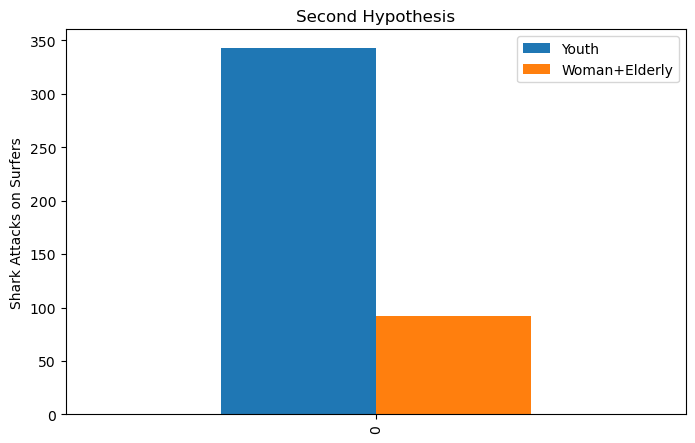

In [20]:
#present chart of second hypothesis
second_hypothesis = pd.pivot_table(shark_attacks.query('Activity == "surfing"'), index = 'Age Group', columns = 'Sex', aggfunc = 'count', values = 'Year')
second_hypothesis_chart = pd.DataFrame({'Youth': youth_surfers, 'Woman+Elderly': woman_elderly_surfers}, index=[0]).plot(kind='bar', figsize=(8,5))
bar_names = {'youth_surfers': 'Youth Surfers', 'woman_elderly_surfers': 'Woman+Elderly'}
second_hypothesis_chart.set_ylabel('Shark Attacks on Surfers')
second_hypothesis_chart.set_title('Second Hypothesis')

plt.show()

In [21]:
#print results second hypothesis
print(f'The total number of victims between woman of all ages and elderly people while surfing is {woman_elderly_surfers}.\nThe number of children and teenagers of all genders victims of shark attacks while surfing is {youth_surfers}.')
print(f'\nThe results shows that my second hypothesis - The number of children and teenagers of all genders victims of shark attacks while surfing is larger than the combined number between woman of all ages and elderly of all genders that were attacked by a shark while surfing - was {result}.')

The total number of victims between woman of all ages and elderly people while surfing is 92.
The number of children and teenagers of all genders victims of shark attacks while surfing is 343.

The results shows that my second hypothesis - The number of children and teenagers of all genders victims of shark attacks while surfing is larger than the combined number between woman of all ages and elderly of all genders that were attacked by a shark while surfing - was True.


### INSIGHTS DURING THE PROJECT  
I noticed a discrepancy in the attacks between USA and the other countries.
I will include the column Country to present additional analyses.

### COUNTRY
Clean and organize and present results of Country column.

In [22]:
#set all letters in Country column to uppercase
shark_attacks['Country'] = shark_attacks['Country'].str.upper()

#check the number that each word appear in column Country
#print(dict(shark_attacks['Country'].value_counts()))

In [23]:
#create a dictionary with the countries that appear the most
country_dict_pattern = {'.*USA.*': 'USA', '.*AUS.*': 'AUSTRALIA', '.*AFR.*': 'AFRICA', '.*BAH.*': 'BAHAMAS', 
                        '.*PAP.*': 'PAPUA NEW GUINEA', '.*GUI.*': 'PAPUA NEW GUINEA', '.*ZEAL.*': 'NEW ZEALAND', 
                        '.*MEX.*': 'MEXICO', '.*BRA.*': 'BRAZIL', '.*REU.*': 'REUNION ISLAND', '.*ITAL.*': 'ITALY',
                        '.*FIJ.*': 'FIJI', '.*CALED.*': 'NEW CALEDONIA', '.*PHIL.*': 'PHILIPPINES', '.*EGY*': 'EGYPT', 
                        '.*MOZ.*': 'AFRICA', '.*CUBA.*': 'CUBA', '.*SPAI.*': 'SPAIN', '.*INDIA.*': 'INDIA', '.*JAP.*': 'JAPAN',
                        '.*PANA.*': 'PANAMA', '.*IRA.*': 'IRAN', '.*ENGL.*': 'ENGLAND', '.*INDO.*': 'INDONESIA',
                        '.*ONG.*': 'HONG KONG', '.*REE.*': 'GREECE', '.*COSTA RICA.*': 'COSTA RICA', '.*IETN.*': 'VIETNAM',
                        '.*ANK.*': 'SRI LANKA', '.*TONGA.*': 'TONGA', '.*FRAN.*': 'FRANCE', '.*NIC.*': 'NICARAGUA'}

In [24]:
#treatment of the column Country with the dictionary that was loaded in the beginning of the code
shark_attacks['Country'] = shark_attacks['Country'].replace(country_dict_pattern, regex = True)

#replace the words from the column Country that matches with the keys from dict with the values of the dict
shark_attacks['Country'] = shark_attacks['Country'].where(shark_attacks['Country'].isin(country_dict_pattern.values()), 'Rest of the World') 

#present the number of attacks for each Country
country_attacks = shark_attacks['Country'].value_counts()
#activity_attacks = activity_attacks.round().astype(int)
print(f'\n% of attacks for each country:\n\n{country_attacks}.')



% of attacks for each country:

USA                  2495
AUSTRALIA            1460
Rest of the World     813
AFRICA                642
PAPUA NEW GUINEA      151
NEW ZEALAND           143
BAHAMAS               131
BRAZIL                122
MEXICO                101
ITALY                  73
FIJI                   70
REUNION ISLAND         65
NEW CALEDONIA          64
PHILIPPINES            62
INDIA                  50
IRAN                   47
CUBA                   46
SPAIN                  45
HONG KONG              42
JAPAN                  36
PANAMA                 32
ENGLAND                25
GREECE                 25
INDONESIA              24
COSTA RICA             18
NICARAGUA              15
VIETNAM                15
SRI LANKA              15
FRANCE                 13
Name: Country, dtype: int64.


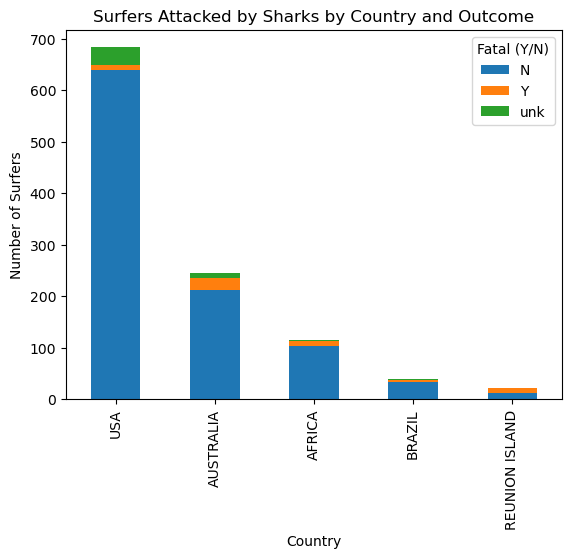

In [25]:
#Filter the data to include only surfers
surfers = shark_attacks[shark_attacks['Activity'] == 'surfing']

# Group the data by country and age group
group_surfers = surfers.groupby(['Country'])

# Count the number of surfers in each age group who suffered a fatal or non-fatal attack
count_surfers = group_surfers['Fatal (Y/N)'].value_counts().unstack().fillna(0)

# Select the top 10 countries based on the total number of surfers
top_countries = count_surfers.sum(axis = 1).sort_values(ascending = False).head(5)

# Filter the counts data for the top 10 countries
count_surfers = count_surfers.loc[top_countries.index]

# Plot the counts data as a stacked bar chart
count_surfers.plot(kind='bar', stacked=True)

# Add a title and axis labels
plt.title('Surfers Attacked by Sharks by Country and Outcome')
plt.xlabel('Country')
plt.ylabel('Number of Surfers')

plt.show()

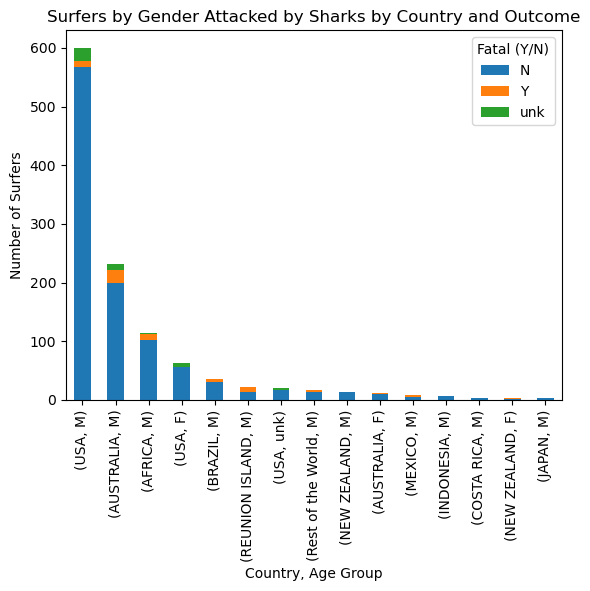

In [26]:
#include only surfers
surfers = shark_attacks[shark_attacks['Activity'] == 'surfing']

#group the surfers by country and age group
group_surfers = surfers.groupby(['Country', 'Sex'])

#count the number of surfers in each age group who suffered a fatal or a non-fatal attack
count_surfers = group_surfers['Fatal (Y/N)'].value_counts().unstack().fillna(0)

#set the top occurancies
top_countries = count_surfers.sum(axis = 1).sort_values(ascending = False).head(15)
count_surfers = count_surfers.loc[top_countries.index]

#create the chart
count_surfers.plot(kind='bar', stacked=True)
plt.title('Surfers by Gender Attacked by Sharks by Country and Outcome')
plt.xlabel('Country, Age Group')
plt.ylabel('Number of Surfers')

plt.show()

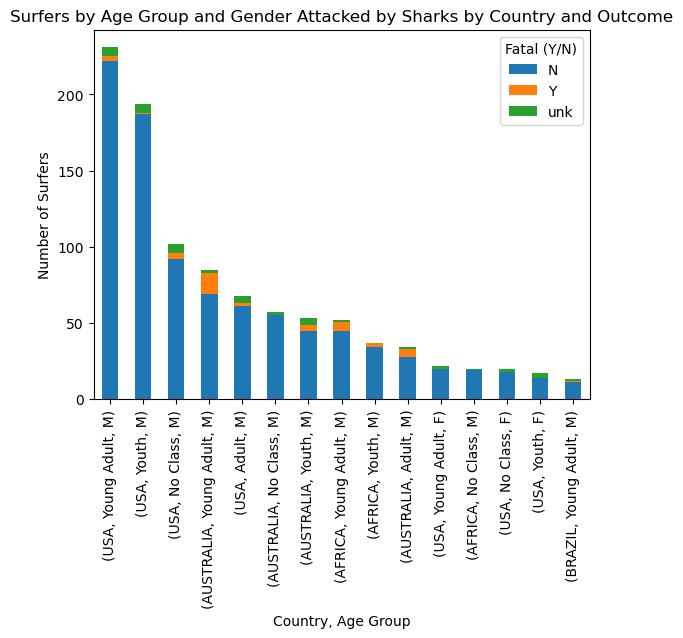

In [27]:
#Filter the data to include only surfers
surfers = shark_attacks[shark_attacks['Activity'] == 'surfing']

# Group the data by country and age group
grouped = surfers.groupby(['Country', 'Age Group', "Sex"])

# Count the number of surfers in each age group who suffered a fatal or non-fatal attack
counts = grouped['Fatal (Y/N)'].value_counts().unstack().fillna(0)

# Select the top 10 countries based on the total number of surfers
top_countries = counts.sum(axis = 1).sort_values(ascending = False).head(15)

# Filter the counts data for the top 10 countries
counts = counts.loc[top_countries.index]

# Plot the counts data as a stacked bar chart
counts.plot(kind='bar', stacked=True)

# Add a title and axis labels
plt.title('Surfers by Age Group and Gender Attacked by Sharks by Country and Outcome')
plt.xlabel('Country, Age Group')
plt.ylabel('Number of Surfers')


plt.show()

# Conclusion:


The age group most affected by shark attacks is young adults (20 - 40 years old), which does not support the first hypothesis. But is important to note that 20 and 21 years old young adult compound the largest victims among surfers.  
The second hypothesis was true - the number of victims comprised by woman of all ages combined with elderly people of all genres still smaller than the youth surfer victims.  
As an extra observation, the number of shark attacks in USA is way higher than the rest of the world. The top sources of information for this dataset are either american companies or professionals which could lead to a bias. 
Also Australia has the largest fatality ratio among surfers.